# Task:

Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.

Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python.


####Import Libraries


In [165]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

####Load Dataset

In [166]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


###Column Summary

`Unnamed: 0:` Likely an index column.

`TV:` Advertising budget allocated to TV (in thousands of dollars).

`Radio:` Advertising budget allocated to Radio (in thousands of dollars).

`Newspaper:` Advertising budget allocated to Newspapers (in thousands of dollars).

`Sales:` Resulting sales (in thousands of units).

####Drop Unwanted Column

In [167]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


###Analyze the dataset

####Shape of the dataset

In [168]:
df.shape

(200, 4)

####Information of the dataset

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


####Checking null values

In [170]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


####Desciptive analysis of dataset

In [171]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Checking Outliers

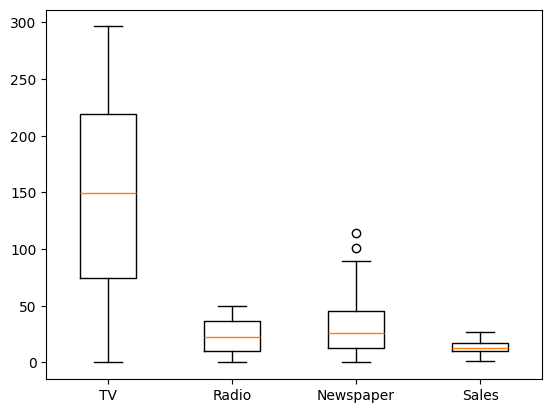

In [172]:
plt.boxplot(df, labels=df.columns)
plt.show()

Remove Outliers

In [173]:
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Newspaper'] >= lower_bound) & (df['Newspaper'] <= upper_bound)]

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [174]:
df.describe()

,TV,Radio,Newspaper,Sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,13.980808
std,85.443221,14.862111,20.446303,5.196097
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,10.325000
50%,149.750000,22.400000,25.600000,12.900000
75%,218.475000,36.325000,44.050000,17.375000
max,293.600000,49.600000,89.400000,27.000000


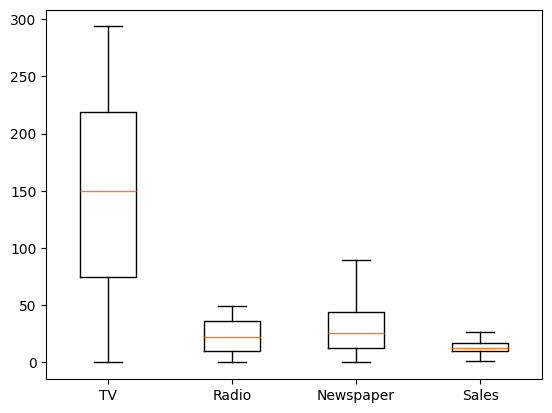

In [175]:
plt.boxplot(df, labels=df.columns)
plt.show()

####Check duplicated value

In [176]:
df.duplicated().sum()

0

###Visulization

Text(0.5, 0, 'Newspaper')

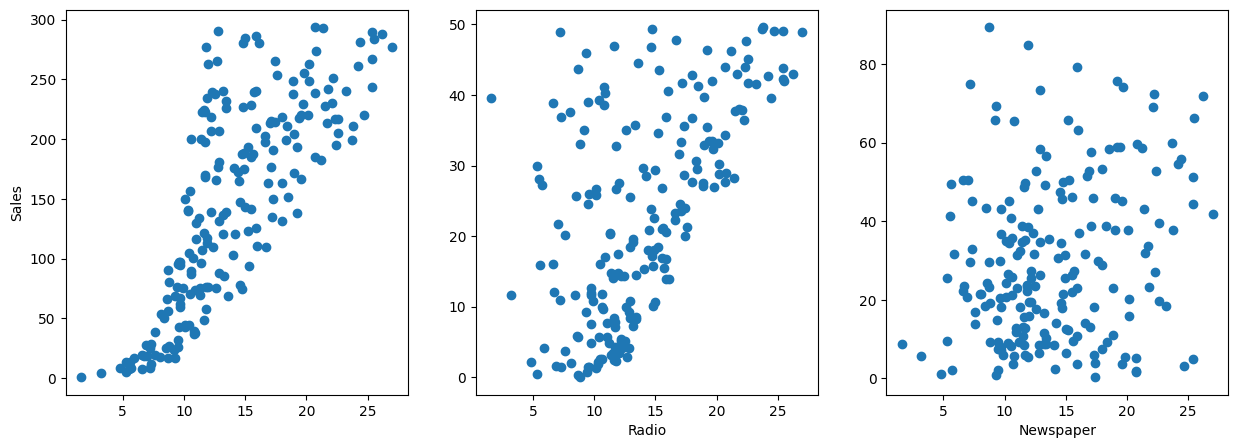

In [177]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax[0].scatter(x=df['Sales'], y=df['TV'])
ax[0].set_ylabel('Sales')

ax[1].scatter(x=df['Sales'], y=df['Radio'])
ax[1].set_xlabel('Radio')

ax[2].scatter(x=df['Sales'], y=df['Newspaper'])
ax[2].set_xlabel('Newspaper')

pl

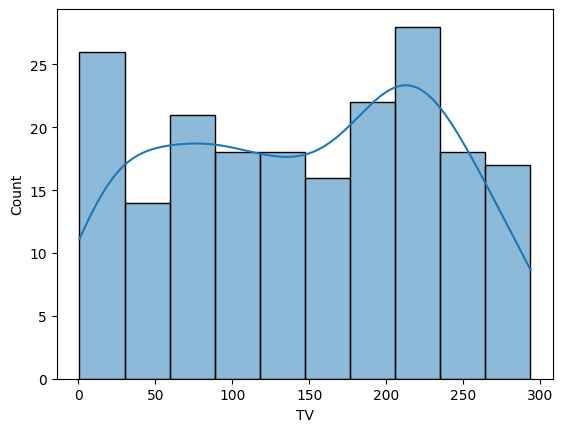

In [178]:
sns.histplot(data=df, x='TV', bins=10, kde=True)
plt.show()

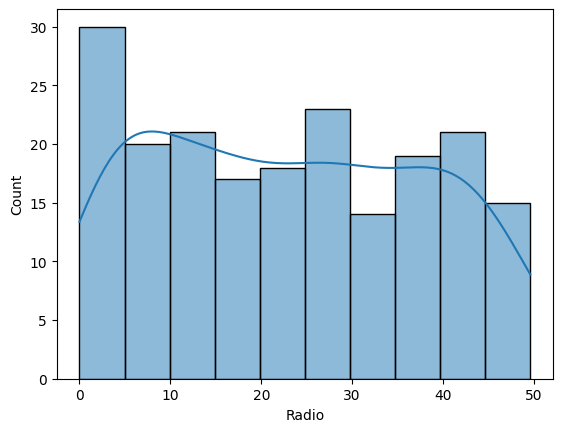

In [179]:
sns.histplot(data=df, x='Radio', bins=10, kde=True)
plt.show()

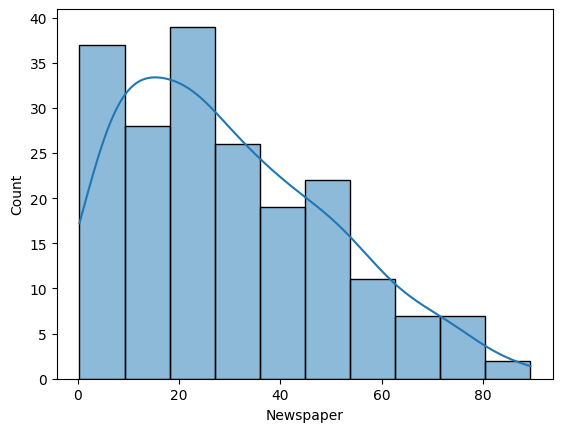

In [180]:
sns.histplot(data=df, x='Newspaper', bins=10, kde=True)
plt.show()

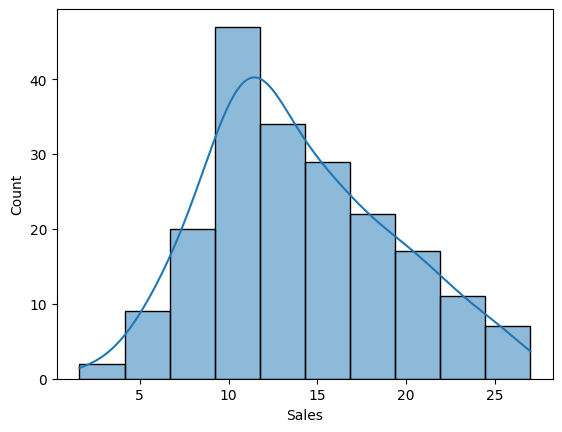

In [181]:
sns.histplot(data=df, x='Sales', bins=10, kde=True)
plt.show()

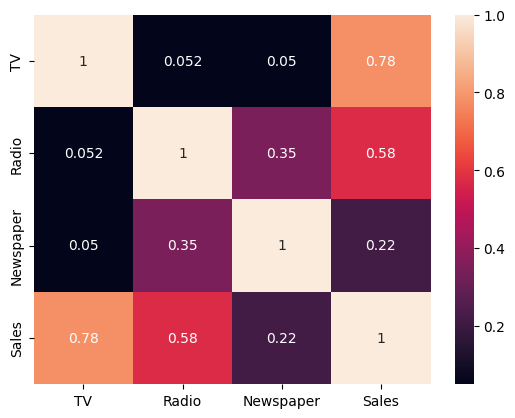

In [182]:
sns.heatmap(df.corr(), annot=True)
plt.show()

###Model Selection

In [183]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [184]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [185]:
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


####Split the data into training and testing

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardiation the data

In [187]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

Reverse Standardization

In [188]:
def reverse_standardization(y_pred):
    return scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

In [189]:
X_train

array([[ 4.26751502e-01,  1.39195161e+00, -1.35187881e+00],
       [-1.62566033e+00,  1.72494430e+00,  2.15543509e+00],
       [-1.04406157e-01, -5.66045429e-01, -9.45164376e-01],
       [-8.72022159e-01, -3.99549082e-01, -8.15972731e-01],
       [-1.43579476e+00, -7.99140314e-01, -1.21136094e-02],
       [-1.49869501e+00, -1.93093611e-01, -6.19792826e-01],
       [-1.52163753e-01,  1.24543483e+00,  7.63036258e-01],
       [ 7.14461901e-01, -1.59794342e-01, -9.21239997e-01],
       [-1.44977260e+00,  8.05884470e-01,  1.72001140e+00],
       [ 1.38190343e+00,  1.38529176e+00, -1.19397791e+00],
       [ 4.98970307e-01,  3.79653822e-01, -5.62374318e-01],
       [ 6.83011777e-01, -9.72296515e-01, -1.70014508e-01],
       [ 1.03828170e+00,  2.99735575e-01, -9.06885370e-01],
       [-1.28203860e+00, -1.28530965e+00, -7.72908850e-01],
       [-1.40667428e+00, -1.42516658e+00, -4.42752425e-01],
       [ 5.74683570e-01, -1.29862935e+00, -1.15091403e+00],
       [-3.75809083e-01, -1.01891549e+00

In [190]:
X_test

array([[-1.3600815 ,  0.10659981, -1.32795443],
       [-0.10557098, -0.57936514, -0.20829351],
       [ 1.55080225,  1.10557789,  1.23673895],
       [-0.5085985 , -1.15211257,  0.21277555],
       [-1.59071575,  0.92576184,  0.72954213],
       [ 0.83909758,  1.73160416, -1.28010568],
       [ 0.84142722,  0.67934725,  0.3802462 ],
       [-0.41191849, -0.37290967,  0.41374033],
       [-0.0112206 ,  0.05998084, -0.51931044],
       [ 1.58458201, -0.82577973, -1.12698965],
       [ 0.28231389, -0.32629069,  0.03573515],
       [ 0.54905754,  1.64502606,  1.09797756],
       [-1.6419678 ,  0.3396947 ,  0.54771685],
       [-0.14051556, -0.2530323 , -0.63893233],
       [-0.83707758, -1.47844541, -0.72506009],
       [-0.68215659, -0.87239871,  0.27497893],
       [-1.6361437 ,  1.05895892,  0.98792542],
       [ 0.6003096 , -1.35856804, -0.41882805],
       [-1.20632534,  0.18651806, -0.4475373 ],
       [-0.8382424 ,  0.29973558, -0.66764158],
       [-0.85222023,  0.79922462,  1.088

In [191]:
y_train

array([[ 1.28847909],
       [-1.32003069],
       [-0.12204842],
       [-0.60510579],
       [-1.32003069],
       [-1.24274151],
       [ 0.61219878],
       [ 0.36100895],
       [-0.9335848 ],
       [ 2.19662695],
       [ 0.63152108],
       [-0.21865989],
       [ 0.94067779],
       [-1.24274151],
       [-1.37799757],
       [-0.45052743],
       [-0.58578349],
       [ 1.42373516],
       [-0.14137071],
       [-0.41188284],
       [ 1.65560269],
       [-1.08816315],
       [ 1.44305745],
       [-0.85629562],
       [ 2.19662695],
       [-0.48917202],
       [ 1.28847909],
       [-1.16545233],
       [-0.79832873],
       [ 0.36100895],
       [ 0.99864467],
       [-1.3007084 ],
       [ 0.14846371],
       [-0.9142625 ],
       [ 1.77153646],
       [ 1.30780139],
       [-0.23798219],
       [-0.62442808],
       [ 0.12914141],
       [ 1.09525615],
       [ 0.28371977],
       [ 0.39965354],
       [-0.60510579],
       [-0.87561791],
       [ 0.65084337],
       [-0

In [192]:
y_test

array([[-0.87561791],
       [-0.35391595],
       [ 2.003404  ],
       [-0.70171726],
       [-1.3007084 ],
       [ 2.06137088],
       [ 1.17254533],
       [-0.41188284],
       [ 0.10981912],
       [ 0.1871083 ],
       [ 0.07117453],
       [ 1.6169581 ],
       [-1.6485097 ],
       [-0.16069301],
       [-0.89494021],
       [-0.66307267],
       [-1.43596446],
       [-0.66307267],
       [-0.75968414],
       [-0.39256054],
       [-0.27662678],
       [ 0.76677714],
       [ 1.96475941],
       [-1.41664216],
       [ 0.57355419],
       [ 1.59763581],
       [-1.35867528],
       [-0.41188284],
       [-1.43596446],
       [-0.45052743],
       [ 0.82474402],
       [ 0.03252994],
       [-1.01087397],
       [-0.08340383],
       [-0.39256054],
       [ 1.07593385],
       [ 0.28371977],
       [-0.45052743],
       [ 0.76677714],
       [ 0.49626501]])

####Linear Regression

In [193]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [194]:
model_lr.score(X_test, y_test), model_lr.score(X_train, y_train)

(0.8989454779619589, 0.8935961872087126)

In [196]:
y_pred_lr = model_lr.predict(X_test)
reverse_standardization(y_pred_lr)

array([ 8.90256277, 12.01306921, 23.21144476,  8.92395077, 10.46730727,
       21.8971966 , 19.19942584, 11.45452564, 14.09761442, 17.80409911,
       14.23800136, 20.78452004,  8.64408107, 12.72572094,  6.6559316 ,
        9.02264615, 10.68293193, 12.59775389,  9.81124446, 11.52734658,
       13.02609227, 17.1241863 , 22.86221509,  6.15063371, 17.18465923,
       20.92972237,  8.04228549, 14.63383829,  6.88807843, 12.27802277,
       17.76134152, 13.69977749,  6.65364677, 14.36955633, 15.60727518,
       18.20272077, 15.28390484, 11.95597478, 18.1794502 , 16.23847994])

In [197]:
mean_squared_error(y_test, y_pred_lr)

0.10233224003855101

In [198]:
mean_absolute_error(y_test, y_pred_lr)

0.24147833135885258

In [199]:
r2_score(y_test, y_pred_lr)

0.8989454779619589

In [200]:
np.sqrt(mean_squared_error(y_test, y_pred_lr))

0.31989410753959036

####Random Forest Regressor

In [201]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [202]:
model_rf.score(X_test, y_test), model_rf.score(X_train, y_train)

(0.9852716263996372, 0.9969178061272409)

In [205]:
y_pred_rf = model_rf.predict(X_test)
reverse_standardization(y_pred_rf)

array([ 8.343, 13.365, 23.778, 10.429,  6.076, 23.403, 19.447, 12.461,
       15.417, 14.411, 14.39 , 22.341,  5.63 , 13.677,  9.061, 10.169,
        6.019, 11.548, 10.072, 11.935, 13.026, 17.782, 24.809,  7.168,
       17.055, 22.076,  7.779, 12.092,  7.402, 12.606, 18.639, 14.453,
        9.122, 12.917, 12.149, 19.043, 15.21 , 12.546, 19.134, 16.45 ])

In [206]:
mean_squared_error(y_test, y_pred_rf)

0.014914596915142669

In [207]:
mean_absolute_error(y_test, y_pred_rf)

0.09943252854888879

In [208]:
np.sqrt(mean_squared_error(y_test, y_pred_rf))

0.12212533281486962

In [209]:
r2_score(y_test, y_pred_rf)

0.9852716263996372